In [ ]:
from typing import Annotated #add some speical things to do 
from typing_extensions import TypedDict  #it tell you to key value relation

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [16]:
class state(TypedDict):
    message:Annotated[list,add_messages]

graph_builder=StateGraph(state)

In [6]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama3-8b-8192")

In [8]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000022DBE04F010>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000022DBDE24250>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [9]:
#this is node #it is returing a message in dictionary format after the mpdel get invoked
def chatbot(state:state):
    return {"message":[llm.invoke(state["message"])]}

In [17]:
#here we adding the node 
graph_builder.add_node("LLMchatbot",chatbot)
#now come the edges 
graph_builder.add_edge(START,"LLMchatbot") #from the start goes toward the chatbot

graph_builder.add_edge("LLMchatbot",END) #from the chatbot goes to end of the chatbot

graph=graph_builder.compile()

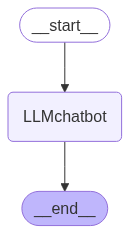

In [18]:
#now in order to visuilze this whole process
from IPython.display import Image,display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [20]:
response=graph.invoke({"message":"Hi"})

In [21]:
response["message"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [24]:
for event in graph.stream({"message":"Hi"}):
    for value in event.values():
     print(value["message"][-1].content)


Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?
